In [2]:
import numpy as np
import pandas as pd
import re
import nltk
import gensim
from gensim import models
from gensim import corpora
import ast

# Start with keywords and titles

In [3]:
import matplotlib.pyplot as plt
pd.options.display.max_colwidth = 200
%matplotlib inline

import unicodedata
from nltk.tokenize import word_tokenize
from string import punctuation
remove_terms = punctuation
sent_tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')

import spacy
nlp = spacy.load('en')

from sklearn.feature_extraction.text import TfidfVectorizer

In [4]:
df1 = pd.read_csv('df1.csv')
df1.head() # has all the necessary columns, but keyword and keyword_norm are not clean

,abstract,bibcode,body,keyword,keyword_norm,title
0,"Stellar-wind variability in the archetypal nonradially pulsating O star ζ Oph (09.5 V) is discussed on the basis of new time-series lUE and HST spectroscopy and archival results. Time-variable ""di...",1993ApJ...417..338H,"\nTHE ASTROPHYSICAL JOURNAL, 417 : 338-346, 1993 November 1\n© 1993. The American Astronomical Society. All rights reserved. Printed in U.S.A.\n\n\nTIME-SERIES OBSERVATIONS OF 0 STARS. III. IUE AN...","['STARS: EARLY-TYPE', 'STARS: INDIVIDUAL CONSTELLATION NAME: ζ OPHIUCHI', 'STARS: MASS LOSS', 'ULTRAVIOLET: STARS']","['stars early type', '-', 'stars luminosity function;mass function', 'astronomy uv']","[""Time-Series Observations of O Stars. III. IUE and HST Spectroscopy of zeta Ophiuchi and Implications for the ``Photospheric Connection''""]"
1,We present an analysis of observations of 24 absorption lines produced zero redshift by Milky Way disk and halo gas along the sight line to 3C 273. The observations were obtained with the intermed...,1993ApJ...404..124S,"\nTHE ASTROPHYSICAL JOURNAL, 404: 124-143, 1993 February 10\n© 1993. The American Astronomical Society. All rights reserved. Printed in U.S.A.\n\n\nOBSERVATIONS OF THE GASEOUS GALACTIC HALO TOWARD...","['Absorption Spectra', 'Astronomical Spectroscopy', 'Galactic Halos', 'Interstellar Gas', 'Milky Way Galaxy', 'Abundance', 'Galactic Structure', 'Ionized Gases', 'Quasars', 'Spectral Line Width', ...","['absorption', 'techniques spectroscopic', 'galaxies halos', 'ism dust extinction', 'galaxy general', 'nuclear reactions;nucleosynthesis;abundances', 'galaxies structure', 'astrochemistry', 'galax...",['Observations of the Gaseous Galactic Halo toward 3C 273 with the Goddard High Resolution Spectrograph']
2,"The Faint Object Camera on the HST has imaged the central region of the synchrotron jet in 3C 66B with ultra-high spatial resolutions. The images have an angular resolution of 0.1'', corresponding...",1991ApJ...373L..55M,"19 91ApJ. . .373L. .55M\n\nThe Astrophysical Journal, 373:L55-L58,1991 June 1\n© 1991. The American Astronomical Society. All rights reserved. Printed in U.S.A.\n\nHST OBSERVATIONS OF 3C 66B: A DO...","['Hubble Space Telescope', 'Radio Galaxies', 'Radio Jets (Astronomy)', 'Faint Objects', 'Galactic Structure', 'Interstellar Magnetic Fields', 'Spatial Resolution', 'Synchrotron Radiation', 'Very L...","['space vehicles', 'astronomy radio', 'astronomy radio', 'faint objects', 'galaxies structure', 'ism magnetic fields', 'telescopes', 'synchrotron radiation', '-', '-', 'galaxies', 'galaxies jets',...",['HST Observations of 3C 66B: A Double-stranded Optical Jet']
3,"We have used the Goddard Infrared Array Camera to obtain a high resolution (0.7"" FWHM) image of the nucleus of NGC 1068 at 12.4 microns. The location of the 12.4 micron peak relative to the peak o...",1993ApJ...409L...5B,"\nTmAnonwsxcALJouRNAL, 409:L5-L8, 1993 May20\n© 1993.The American Astronomical Society. All rights reserved. Printed in U.S.A.\n\n\nHIGH-RESOLUTION MID-INFRARED IMAGING AND ASTROMETRY OF THE NUCLE...","['Active Galactic Nuclei', 'Astrometry', 'Infrared Imagery', 'Seyfert Galaxies', 'Cosmic Dust', 'Infrared Astronomy', 'Molecular Clouds', 'Thermal Emission', 'Astronomy', 'ASTROMETRY', 'GALAXIES: ...","['galaxies active', 'astrometry', 'astronomy infrared', 'galaxies seyfert', 'cosmic dust', 'astronomy infrared', 'astrochemistry', 'thermodynamics', '-', 'astrometry', 'galaxies active', 'galaxies...",['High-Resolution Mid-Infrared Imaging and Astrometry of the Nucleus of the Seyfert Galaxy NGC 1068']
4,"New high spatial resolution observations of the material around Eta Carinae, obtained with the Hubble Space Telescope Wide Field/Planetary Camera, are presented. The star Eta Carinae is one of the...",1991AJ....102..654H,"102. . 654H\n\nVOLUME 102, NUMBER 2\n\nTHE ASTRONOMICAL JOURNAL\n\nAUGUST 1991\n\n1991AJ\n\nHUBBLE SPACE TELESCOPE IMAGING OF 7] CARINAE\nJ. Jeff Hester\nInfrared Processing and Analysis Ce

In [37]:
df_check = pd.read_csv('df_key_0620.csv')

In [38]:
df_check.head(10)

,bibcode,key_0620
0,1993ApJ...417..338H,"['star individual constellation name ophiuchi', 'star luminosity functionmass function', 'star early type', 'ultraviolet star', 'star earlytype', 'astronomy uv', 'star mass loss', 'timeserie', 'iu..."
1,1993ApJ...404..124S,"['absorption spectra', 'astronomical spectroscopy', 'nuclear reactionsnucleosynthesisabundance', 'ionized gas', 'astrochemistry', 'galaxy kinematic and dynamic', 'ism dust extinction', 'interstell..."
2,1991ApJ...373L..55M,"['radio source galaxy', 'radio galaxy', 'astronomy radio', 'astrophysic', 'faint object', 'galaxy jet', 'interstellar magnetic field', 'ism magnetic field', 'telescope', 'very large array vla', 'h..."
3,1993ApJ...409L...5B,"['cosmic dust', 'astronomy infrared', 'astrochemistry', 'infrared astronomy', 'astrometry', 'galaxy nucleus', 'thermodynamic', 'active galactic nucleus', 'molecular cloud', 'thermal emission', 'ga..."
4,1991AJ....102..654H,"['space vehicle', 'astrophysic', 'galaxy general', 'star wind outflow', 'nebulae', 'stellar luminosity', 'star luminosity functionmass function', 'hubble space telescope', 'stellar wind', 'wolfray..."
5,1993Natur.365..133T,"['space vehicle', 'astrophysic', 'synchrotron radiation', 'galaxy quasar', 'mhd', 'extragalactic radio source', 'hubble space telescope', 'energetic particle', 'instrumentation detector', 'faint o..."
6,1993PASP..105.1273H,"['star novaecataclysmic variable', 'iue', 'instrumentation detector', 'star variable', 'astronomy radio', 'astronomy uv', 'cataclysmic variable', 'ism jet and outflow', 'ultraviolet photometry', '..."
7,1992AJ....104..959R,"['ism dust extinction', 'astrophysic', 'galaxy quasar', 'astronomical model', 'galaxy elliptical lenticularcd', 'hubble space telescope', 'mass to light ratio', 'gravitational lensing', 'interstel..."
8,1993ApJ...411..750H,"['tin', 'nuclear reaction', 'nuclear reactionsnucleosynthesisabundance', 'instrumentation spectrograph', 'heavy element', 'astrophysic', 'ism atom', 'interstellar matter', 'ism cloud', 'atom', 'hu..."
9,1993AJ....106..455K,"['sky brightness', 'instrumentation detector', 'radio galaxy', 'astronomy radio', 'galactic evolution', 'astrophysic', 'faint object', 'slit', 'technique photometric', 'hubble space telescope', 'g..."


In [40]:
len(df_check)

16408

In [41]:
keywords = []
for i in range(500):
    a = ast.literal_eval(df_check['key_0620'][i])
    keywords = keywords + a
len(keywords)

49109

In [69]:
from collections import Counter
dict_final = Counter(keywords)
sorted_x = sorted(dict_final.items(), key=lambda kv: kv[1], reverse=True)
sorted_x

[('nas526555', 899),
 ('orbital', 500),
 ('orbit', 500),
 ('opticallythin', 500),
 ('optical', 499),
 ('opticalcounterpart', 499),
 ('opticaldepth', 499),
 ('orbitalperiod', 499),
 ('opacity', 498),
 ('opticalimage', 498),
 ('opticalemission', 498),
 ('orientation', 498),
 ('ordermagnitude', 498),
 ('opticallythick', 498),
 ('opticalspectroscopy', 498),
 ('opticalspectra', 498),
 ('opticalnearinfrar', 498),
 ('ongoingstar', 497),
 ('original', 495),
 ('ongoing', 494),
 ('oldstellar', 491),
 ('originate', 491),
 ('oldstar', 490),
 ('nearbygalaxy', 488),
 ('nearir', 488),
 ('nearinfrar', 485),
 ('nearinfrared', 484),
 ('outburst', 482),
 ('often', 479),
 ('nature', 479),
 ('outer', 477),
 ('nationalaeronautic', 477),
 ('offset', 474),
 ('nebulae', 474),
 ('national', 469),
 ('offer', 468),
 ('nasaesatelescope', 468),
 ('nasacontract', 466),
 ('outerdisk', 465),
 ('occur', 464),
 ('nebular', 461),
 ('obvious', 455),
 ('observational', 449),
 ('observable', 441),
 ('outerregion', 439),
 ('

In [5]:
df_key_v1 = pd.read_csv('df_key_v1.csv')
#This version only has 3 columns, bibcode and cleaned 'keyword' and 'keyword_norm' (nan was replaced with placeholders). 

In [6]:
stop_words = nltk.corpus.stopwords.words('english')
f = open('reuters_wos.txt')
reu_stop = f.read().split()
stop_words.extend(x for x in reu_stop if x not in stop_words)
len(stop_words)

298

In [7]:
places = []
with open('pre2_stop.txt', 'r') as filehandle:  
    for line in filehandle:
        currentPlace = line[:-1]
        places.append(currentPlace)

In [8]:
stop_words.extend(x for x in places if x not in stop_words)
len(stop_words)

457

In [9]:
def remove_accented_chars(text):
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return text

def lemmatize_text(text):
    text = nlp(text)
    text = ' '.join([word.lemma_ if word.lemma_ != '-PRON-' else word.text for word in text])
    return text

def remove_stopwords(text):
    tokens = word_tokenize(text)
    tokens = [token.strip() for token in tokens]
    filtered_tokens = [token for token in tokens if token not in stop_words]    
    filtered_text = ' '.join(filtered_tokens) # re-create document from filtered tokens
    return filtered_text

def normalize_corpus(corpus, lemm = True, stopword_removal = True):
    normalized_corpus = []
    for doc in corpus:
        doc = remove_accented_chars(doc)
        doc = doc.lower()
        doc = re.sub(r'[\r|\n|\r\n]+', ' ',doc) # remove extra newlines
        doc = re.sub(' +', ' ', doc)
        doc = doc.strip()
        doc = re.sub(r'[^a-zA-Z0-9\s]', '', doc, re.I|re.A) # remove special characters
        if lemm:
            doc = lemmatize_text(doc)
        if stopword_removal:
            doc = remove_stopwords(doc)
        normalized_corpus.append(doc)
    return normalized_corpus

In [10]:
df_key_v1.loc[0,'keyword'] # is a string!!

"['STARS: EARLY-TYPE', 'STARS: INDIVIDUAL CONSTELLATION NAME: ζ OPHIUCHI', 'STARS: MASS LOSS', 'ULTRAVIOLET: STARS']"

In [12]:
# make a list of all keyword and keyword_norm
keyword_list = [];
for i in range(len(df_key_v1)):
    keyword_list.append(df_key_v1.loc[i,'keyword'])
keyword_norm_list = [];
for i in range(len(df_key_v1)):
    keyword_norm_list.append(df_key_v1.loc[i,'keyword_norm'])

In [13]:
# normalize all keyword and keyword_norm; however, no need to remove stopwords
norm_keyword_all = [];
norm_keyword_norm_all = [];
for i in range(len(df_key_v1)): 
    norm_keyword_all.append(normalize_corpus(ast.literal_eval(keyword_list[i]), lemm = True, stopword_removal = False))
    norm_keyword_norm_all.append(normalize_corpus(ast.literal_eval(keyword_norm_list[i]), lemm = True, stopword_removal = False))
# 'galaxies evolution' should be the same as 'galaxy evolution'

KeyboardInterrupt: 

#### Save the above cell as well. taking too long

In [26]:
key_set_1 = [];
for i in range(len(norm_keyword_all)):
    key_set_1.append(list(set(norm_keyword_all[i] +norm_keyword_norm_all[i])))   

16408

In [ ]:
df_key_v1['key_set_1'] = key_set_1

In [11]:
df_key_v1.columns
# key_set_1 is combined cleaned-up keyword and keyword-norm

Index(['bibcode', 'keyword', 'keyword_norm', 'key_set_1'], dtype='object')

In [29]:
df_key_v1.to_csv('/Users/yanfeiwang/Downloads/df_key_v1.csv', index=False)
# version control: ['bibcode', 'keyword', 'keyword_norm', 'key_set_1'] with key_set_1 being combined cleaned-up keyword and keyword-norm

In [15]:
# understanding how many unique phrases/ keywords are in key_set_1, to use them for training bigram
key_norm = []
key_norm_norm = []
for i in range(len(df_key_v1)):
     for _ in norm_keyword_all[i]:key_norm.append(_)
for i in range(len(df_key_v1)):
     for _ in norm_keyword_norm_all[i]:key_norm_norm.append(_)
print(len(key_norm), len(np.unique(key_norm)), len(key_norm_norm), len(np.unique(key_norm_norm)))                 

IndexError: list index out of range

### Moving on to titles!

In [12]:
title_list = [];
for i in range(len(df1['title'])):
    title_list.append(ast.literal_eval(df1.loc[i,'title'])[0])
len(title_list)

16408

In [13]:
# pre-processing of titles
norm_title_all = normalize_corpus(title_list, lemm = True, stopword_removal = True)
title2word = [[text for text in doc.split()] for doc in norm_title_all]

In [14]:
df_key_v1['title2word'] = title2word
df_key_v1.columns
#'title2word' is cleaned up titles in the format of list of words

Index(['bibcode', 'keyword', 'keyword_norm', 'key_set_1', 'title2word'], dtype='object')

Start with tfidf model, because that might give us better idea of what kind of high-frequency words there are. 
Use subsets of data to speed up the iteration.

In [15]:
abs_list = df1['abstract']
np.unique(abs_list.isna(), return_counts = True)

(array([False,  True]), array([16354,    54]))

In [17]:
remove_terms = punctuation #+ '0123456789'#
remove_terms
# for now, leave the numbers in the texts, because they might be object names, eg, ngc 4343. 
# But in the end, remove them because numbers alone are not keywords

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [18]:
'''This function serves to parse paragraph data: for abstracts and full-texts, it's useful to still keep the sentence 
structure during tokenization, such as in the case of bi-gram training''' 
def tokenize_para (para):
    sent = sent_tokenizer.tokenize(para) # string to sentences, return a list of sentences;
    sent_word = []; # break the sentence into words, return a list of words
    for i in range(len(sent)):
        sent_word.append(word_tokenize(sent[i])); # a list of lists of words
    sent_filt1 = [[word for word in sent if word not in remove_terms] for sent in sent_word]
    sent_filt1 = [' '.join(tok_sent) for tok_sent in sent_filt1] # a list of full sentences (each sentence is a string)
    norm_sent_filt1 = normalize_corpus(sent_filt1) # return the same as above, but after normalization
    norm_00 = [tok_sent for tok_sent in norm_sent_filt1 if len(tok_sent.split()) > 3]
    texts = [[text for text in doc.split()] for doc in norm_sent_filt1]
    para_styles = {'sent': norm_sent_filt1,   # a list of full sentences (each sentence is a string)
                  'word': texts}  # a list of list of words
    return para_styles

In [19]:
# 1000 abstracts, for tfidf model, for the purpose of getting more stop_words
abs_sents = [];
for i in range(1000):
    try:
        abs_sents.append(tokenize_para(abs_list[i])['sent'])       
    except:
        abs_sents.append(['nan'])  
len(abs_sents)

1000

In [20]:
# Concatenate the 1000 abstracts
abs_all_sent1 = [];
abs_n_sent = [];
for i in range(len(abs_sents)):
    number_of_sentences = 0
    for j in range(len(abs_sents[i])):
        number_of_sentences = number_of_sentences + 1;
        abs_all_sent1.append(abs_sents[i][j])
    abs_n_sent.append(number_of_sentences)
print(len(abs_all_sent1), len(abs_n_sent))  

8581 1000


In [21]:
bodylist = df1['body'].tolist()

In [22]:
# parse out introduction
intro_list = [];
for i in range(len(bodylist)):
    try:
        try1 = bodylist[i].lower()
    except:
        try1 = ['nan']
    try:
        split1 = try1.split('introduction')
        try:
            split2 = split1[1].split('observations', 1)
        except:
            intro = ['nan']
    except:
        intro = ['nan']
    try:
        intro = split2[0]
    except:
        intro = ['nan']
    intro_list.append(intro)
len(intro_list)

16408

In [23]:
# parse out conclusion
conc = [];
for i in range(len(bodylist)):
    try:
        try1 = bodylist[i].lower()
    except:
        try1 = ['nan']
    try:
        split1 = try1.split('conclusions')
        if 'thank' in split[1]:
            split2 = split1[1].split('thank')
        elif 'acknowledge' in split[1]:
            split2 = split1[1].split('acknowledge')
        else:
            try:
                split2 = split1[1].split('references')
            except:
                split2 = ['nan']
    except:
        intro = ['nan']
    try:
        intro = split2[0]
    except:
        intro = ['nan']
    conc.append(intro)
len(conc)

16408

In [24]:
intro_conc = [];
for i in range(len(bodylist)):
    intro_conc.append(intro_list[i]+conc[i])
len(intro_conc)

16408

In [25]:
norm_body_all = normalize_corpus(intro_conc, lemm = True, stopword_removal = True)
#body2word = [[text for text in doc.split()] for doc in norm_body_all]
len(norm_body_all)

16408

In [29]:
type(norm_body_all[16407])

str

In [28]:
len(norm_body_all)

16408

In [26]:
df_key_v1['norm_body'] = norm_body_all

In [27]:
df_key_v1.columns
# 'norm_body_all' is cleaned-up introduction+ conclusion from maintext, as one string

Index(['bibcode', 'keyword', 'keyword_norm', 'key_set_1', 'title2word',
       'norm_body'],
      dtype='object')

In [30]:
norm_body_5 = [];
for i in range(5):
    norm_body_5.append(norm_body_all[i])
norm_body_5

['lineprofile variability earlytype star direct dynamical phenomenon atmosphere quasihydrostatic region continuumform layer outermost region stellar wind probe resonanceline p cygni profile fullerton 1992 howarth 1992 prinja 1992 evident variability time scale luminous ob star range hour day intensive timeserie spectroscopy require characterize fully nature variability moreover coordinate precise light element ratio heliumhydrogen deuteriumhydrogen couple big bang nucleosynthesis theory tightly constrain cosmic baryonic mass density burl tytler 1996 omeara 2001 steigman 2010 cooke pettini steidel 2018 complement independent cosmic microwave background planck xiii 2016 triumph theoretical astrophysic cosmology baryonic cosmic mean established observer perform census baryon universe cosmic time fukugita hogan peeble 1998 prochaska tumlinson 2009 early time growth substantial structure accept majority baryon cool 104k diffuse plasma galaxy intergalactic medium igm sargent 1980 miraldaescu

In [31]:
tvec3 = TfidfVectorizer(min_df=0.005, max_df=0.2)

X3 = tvec3.fit_transform(norm_body_5)
abs_dict_list = [];
weights3 = [];
for i in range(X3.shape[0]):
    
    weights3_0 = np.squeeze(X3[i].toarray())
    df3 = pd.DataFrame({'term': tvec3.get_feature_names(), 'frequency': weights3_0})
    tfidf_dict = df3.sort_values(by='frequency', ascending=False).head(40).to_dict()
    abs_dict_list.append(tfidf_dict)

In [36]:
tvec3 = TfidfVectorizer()

X3 = tvec3.fit_transform(norm_body_5)
abs_dict_list = [];
weights3 = [];
for i in range(X3.shape[0]):
    
    weights3_0 = np.squeeze(X3[i].toarray())
    df3 = pd.DataFrame({'term': tvec3.get_feature_names(), 'frequency': weights3_0})
    tfidf_dict = df3.sort_values(by='frequency', ascending=False).head(40).to_dict()
    abs_dict_list.append(tfidf_dict)

<BarContainer object of 25 artists>

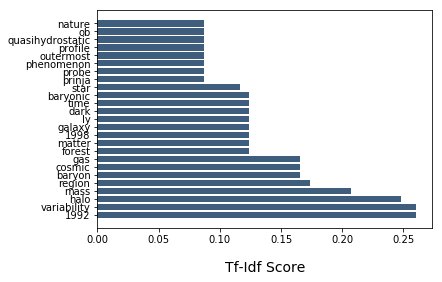

In [41]:
df4plot = pd.DataFrame.from_dict(abs_dict_list[0])
df4p1 = df4plot.sort_values(by='frequency', ascending=False).head(25)
plt.xlabel("Tf-Idf Score", labelpad=16, fontsize=14)
plt.barh(df4p1.term, df4p1.frequency, align='center', color='#3F5D7D')

### - Iterate through preprocessing and tfidf to construct two vocabularies of stop-words
### - Iterate the above for more text (publication 1000-2000, 2000-3000, etc)
### - Partition the high-frequency words into the two vocabularies of stop-words

In [45]:
from gensim.test.utils import datapath
from gensim.models.word2vec import Text8Corpus
from gensim.models.phrases import Phrases, Phraser
sentences = Text8Corpus(datapath('testcorpus.txt'))

In [46]:
phrases = Phrases(sentences, min_count=1, threshold=1)
print(phrases[title2word[0]])
# random file 'sentences' do not help!

['timeserie', 'star', 'iii', 'iue', 'hst', 'spectroscopy', 'zeta', 'ophiuchi', 'photospheric', 'connection']


/Users/yanfeiwang/miniconda3/lib/python3.7/site-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [ ]:
total_key_norm = df_key_v1['key_set_1']

In [67]:
len(total_key_norm)

16408

In [68]:
import ast
key_norm = [];
for i in range(len(total_key_norm)):
    key_norm.append(ast.literal_eval(total_key_norm[i]))

["Time-Series Observations of O Stars. III. IUE and HST Spectroscopy of zeta Ophiuchi and Implications for the ``Photospheric Connection''",
 'Observations of the Gaseous Galactic Halo toward 3C 273 with the Goddard High Resolution Spectrograph',
 'HST Observations of 3C 66B: A Double-stranded Optical Jet',
 'High-Resolution Mid-Infrared Imaging and Astrometry of the Nucleus of the Seyfert Galaxy NGC 1068',
 'Hubble Space Telescope Imaging of N Carninae',
 'Internal structure and polarization of the optical jet of the quasar 3C273',
 'Imaging the Bipolar Nebula around HM Sagittae',
 'Hubble Space Telescope Wide Field Camera Imaging of the Gravitational Lens 2237+0305',
 'The Interstellar Abundances of Tin and Four Other Heavy Elements',
 'Deep Hubble Space Telescope Imaging of 53WO44: an SO Radio Galaxy at z=0.311']

In [74]:
len(key_norm)

16408

In [73]:
key_norm_all = []
for i in range(len(key_norm)):
    key_norm_all.extend(x for x in key_norm[i] if x not in key_norm_all)
len(key_norm_all)

8684

In [77]:
word4bigram = [word_tokenize(key) for key in key_norm_all]

In [50]:
# tokenize and clean all sentences, to prepare for building bigram model on entire list of maintext
## run on google colab
body_sents_words = [];
for i in range(len(norm_body_all)):
    try:
        body_sents_words.append(tokenize_para(norm_body_all[i])['word'])       
    except:
        body_sents_words.append([['nan']]) 
len(body_sents_words)

16408

In [51]:
body_sents_words[0]

[['lineprofile',
  'variability',
  'earlytype',
  'star',
  'direct',
  'dynamical',
  'phenomenon',
  'atmosphere',
  'quasihydrostatic',
  'region',
  'continuumform',
  'layer',
  'outermost',
  'region',
  'stellar',
  'wind',
  'probe',
  'resonanceline',
  'p',
  'cygni',
  'profile',
  'fullerton',
  '1992',
  'howarth',
  '1992',
  'prinja',
  '1992',
  'evident',
  'variability',
  'time',
  'scale',
  'luminous',
  'ob',
  'star',
  'range',
  'hour',
  'day',
  'intensive',
  'timeserie',
  'spectroscopy',
  'require',
  'characterize',
  'fully',
  'nature',
  'variability',
  'moreover',
  'coordinate',
  'precise',
  'light',
  'element',
  'ratio',
  'heliumhydrogen',
  'deuteriumhydrogen',
  'couple',
  'big',
  'bang',
  'nucleosynthesis',
  'theory',
  'tightly',
  'constrain',
  'cosmic',
  'baryonic',
  'mass',
  'density',
  'burl',
  'tytler',
  '1996',
  'omeara',
  '2001',
  'steigman',
  '2010',
  'cooke',
  'pettini',
  'steidel',
  '2018',
  'complement',
  

In [78]:
# combine all list of list of words for full texts
all_full_texts = [];    
for i in range(len(body_sents_words)):
    all_full_texts = all_full_texts + body_sents_words[i]
len(all_full_texts)

312028

In [ ]:
all_full_texts = [];    
for i in range(1000):
    all_full_texts = all_full_texts + body_sents_words[i]
len(all_full_texts)

In [79]:
# tokenize and clean all sentences, to prepare for building bigram model on entire list of abstracts
## takes too long to run on local computer
## run on google colab
sents = [];
for i in range(len(abs_list)):
    try:
        sents.append(tokenize_para(abs_list[i])['word'])       
    except:
        sents.append([['nan']]) 
len(sents)

16408

In [80]:
# combine all list of list of words for abstracts
all_abstracts = [];    
for i in range(len(sents)):
    all_abstracts = all_abstracts + sents[i]
len(all_abstracts)

155996

In [286]:
df_key_v1['abs_words'] = sents
#'abs_words' is tokenized, cleaned abstract , a list of list of words

In [58]:
sents = [];
for i in range(1000,2000):
    try:
        sents.append(tokenize_para(abs_list[i])['word'])       
    except:
        sents.append([['nan']]) 
len(sents)

1000

In [59]:
# combine all list of list of words for abstracts
all_abstracts = [];    
for i in range(len(sents)):
    all_abstracts = all_abstracts + sents[i]
len(all_abstracts)

9583

In [116]:
# train a bigram model on all titles, keywords, keyword_norms, all abstracts, 1000 full papers
bigram2 = gensim.models.phrases.Phrases(title2word+word4bigram+all_abstracts+all_full_texts, min_count=1, threshold=0.005) 
for i in range(100):
    print(bigram2[all_abstracts[i]])

['stellarwind', 'variability', 'archetypal', 'nonradially_pulsate', 'star_oph', '095_v', 'basis_timeserie', 'lue_hst', 'spectroscopy_archival']
['timevariable', 'discrete_absorption', 'component_velocity', '10_km', '08', 'migrate', 'blueward', 'recurrence_time', 'scale', 'phenomenon_20', 'hr']
['variability', 'luminosityclass', 'v_star', 'ubiquity', 'behavior', '0star', 'regime']
['acceleration_slow', 'predict', 'steady_state', 'wind_model', 'timeaveraged', 'velocity_law', 'outflow']
['uv', 'simultaneous_optical', 'ii', 'nonradial_pulsation', 'direct', 'role', 'gross', 'observational_characteristic', 'discrete_absorption', 'component_long', 'year_short', 'hour_time', 'scale']
['linedriven_instability', 'mechanism', 'variability_uv', 'p_cygni', 'profile', 'oph', 'extension_star']
['24', 'absorption_line', 'redshift', 'milky_disk', 'halo_gas', 'sight_line', '3c_273']
['intermediateresolution', 'mode_goddard', 'resolution_spectrograph', 'ghrs_large', 'entrance_aperture']
['spectral_spread

In [61]:
for i in range(100):
    print(bigram1[title2word[i]])

['timeserie', 'star', 'iii', 'iue_hst', 'spectroscopy', 'zeta_ophiuchi', 'photospheric', 'connection']
['gaseous_galactic', 'halo', '3c_273', 'goddard_resolution', 'spectrograph']
['hst', '3c_66b', 'doublestrand', 'optical']
['highresolution_midinfrar', 'imaging', 'astrometry', 'nucleus', 'seyfert_galaxy', 'ngc_1068']
['imaging', 'n', 'carninae']
['internal_structure', 'polarization', 'optical', 'quasar_3c273']
['image', 'bipolar_nebula', 'hm_sagittae']
['wide_field', 'camera_imaging', 'gravitational_lens', '22370305']
['interstellar_abundance', 'tin', 'heavy_element']
['deep_imaging', '53wo44', 'radio_galaxy', 'z0311']
['ngc', '4313', 'ii', 'iband', 'surface_photometry', 'nuclear_region']
['faint_object', 'spectrograph', 'spectra', 'broad_fe', 'ii_absorption', 'line', 'remnant_sn', '1006']
['quasar_absorption', 'line_key', 'project_iii', 'observational', 'milky', 'gas']
['chromospheric_heating', 'acoustic', 'shock', 'confrontation', 'ghrs', 'alpha_tauri', 'k5_iii', 'ab', 'initio_calcu

In [118]:
for i in range(100):
    print(bigram2[title2word[i]])

['timeserie', 'star_iii', 'iue_hst', 'spectroscopy', 'zeta_ophiuchi', 'photospheric', 'connection']
['gaseous_galactic', 'halo', '3c_273', 'goddard_resolution', 'spectrograph']
['hst_3c', '66b', 'doublestrand', 'optical']
['highresolution_midinfrar', 'imaging', 'astrometry', 'nucleus_seyfert', 'galaxy_ngc', '1068']
['telescope_imaging', 'n', 'carninae']
['internal_structure', 'polarization_optical', 'quasar_3c273']
['image_bipolar', 'nebula', 'hm_sagittae']
['telescope_wide', 'field_camera', 'imaging_gravitational', 'lens_22370305']
['interstellar_abundance', 'tin', 'heavy_element']
['deep_telescope', 'imaging', '53wo44', 'radio_galaxy', 'z0311']
['ngc', '4313', 'ii_telescope', 'iband_surface', 'photometry_nuclear', 'region']
['faint_object', 'spectrograph_spectra', 'broad_fe', 'ii_absorption', 'line_remnant', 'sn_1006']
['telescope_quasar', 'absorption_line', 'key_project', 'iii_observational', 'milky_gas']
['chromospheric_heating', 'acoustic_shock', 'confrontation', 'ghrs', 'alpha_ta

In [205]:
title_key_19 = []
for i in range(len(title2word)):
    title_key_19.append(bigram1[title2word[i]])

In [82]:
# train a bigram model on all titles, keywords, keyword_norms, all abstracts, 1000 full papers
bigram1 = gensim.models.phrases.Phrases(title2word+word4bigram+all_abstracts+all_full_texts, min_count=1, threshold=1) 
for i in range(10):
    print(bigram1[all_abstracts[i]])

['stellarwind', 'variability', 'archetypal', 'nonradially_pulsate', 'star', 'oph', '095_v', 'basis_timeserie', 'lue_hst', 'spectroscopy_archival']
['timevariable', 'discrete_absorption', 'component', 'velocity', '10_km', '08', 'migrate', 'blueward', 'recurrence_time', 'scale', 'phenomenon', '20_hr']
['variability', 'luminosityclass', 'v', 'star', 'ubiquity', 'behavior', '0star', 'regime']
['acceleration_slow', 'predict', 'steady_state', 'wind_model', 'timeaveraged', 'velocity_law', 'outflow']
['uv', 'simultaneous_optical', 'ii', 'nonradial_pulsation', 'direct', 'role', 'gross', 'observational_characteristic', 'discrete_absorption', 'component', 'long', 'year_short', 'hour', 'time_scale']
['linedriven_instability', 'mechanism', 'variability', 'uv', 'p_cygni', 'profile', 'oph', 'extension', 'star']
['24', 'absorption_line', 'redshift', 'milky_disk', 'halo', 'gas', 'sight_line', '3c_273']
['intermediateresolution_mode', 'goddard_resolution', 'spectrograph_ghrs', 'large_entrance', 'apertur

In [93]:
# train a trigram model
trigram1 = Phrases(bigram1[n_gram_vocab], min_count=1, threshold=1)

In [96]:
for i in range(100):
    trigrams_ = [t for t in trigram1[bigram1[all_abstracts[i]]]if t.count('_')==2]
    print(trigrams_)

[]
['discrete_absorption_component', 'velocity_10_km']
[]
[]
['discrete_absorption_component']
['uv_p_cygni']
['absorption_line_redshift', 'milky_disk_halo', 'gas_sight_line']
['large_entrance_aperture']
[]
['iv_n_v']
['emission_si_iv', 'h_lyman_line']
['highly_ionized_gas', 'galactic_disk_halo']
['reliable_column_density']
['n_h_profile']
[]
['apparent_optical_depth', 'si_mn_ni', 'representative_low_density']
['warm_ionized_gas']
['si_mn_ni']
['cool_rate_nucleon', 'gas_3c_273']
['time_low_average']
['reliable_column_density', 'amount_highly_ionize', 'gas_3c_273', 'sight_line_galactic', 'star_lmc_smc']
['amount_highly_ionize', 'perpendicular_galactic_plane']
['highly_ionized_gas']
['galactic_radio_loop']
[]
[]
['150_km_s1']
[]
['100_km_s1', 'highly_ionized_specie']
['extragalactic_sight_line']
['absorptionline_equivalent_width']
[]
['column_density_great']
['milky_disk_halo']
[]
['similarity_kinematical_behavior']
['image_central_region']
['image_angular_resolution']
['radio_map_vla']


#### Training with the ensemble of all titles helps: was able to pick up zeta_ophiuchi, galactic_halo
#### Moving forward, using bigram1 model to fit bigrams on everything
#### batch-wise fitting
#### Trigram did not generate more useful keywords

In [64]:
# abs_list to extract keywords
abs_list=['nan' if x is np.nan else x for x in abs_list]
norm_abs_all = normalize_corpus(abs_list, lemm = True, stopword_removal = True)
len(norm_abs_all)

16408

In [97]:
df_key_v1['norm_abs'] = norm_abs_all

In [117]:
# bigram model on entire list of abstracts
abs_2gram =[]
for i in range(len(sents)):
    abs_2gram.append([]);
    for j in range(len(sents[i])):
        abs_2gram[i].append(bigram1[sents[i][j]])
len(abs_2gram)

16408

In [118]:
### replace the space between 2 words that appear as a bigram
### in gensim model with _
matchingwords = [];
for i in range(len(sents)):
    for j in range(len(sents[i])):
        for k in reversed(range(len(sents[i][j]))):
            try: 
                mystring = sents[i][j][k]+'_'+sents[i][j][k+1]  
                if mystring in abs_2gram[i][j]:
                    mytuple = (sents[i][j][k], sents[i][j][k+1])
                    sents[i][j][k] = '_'.join(mytuple)
                    sents[i][j].remove(sents[i][j][k+1])
                else:
                    sents[i][j][k] = sents[i][j][k]
            except:
                sents[i][j][k] = sents[i][j][k]
            sents[i][j]
    matchingwords.append(sents[i])

In [101]:
len(matchingwords)

16408

In [119]:
' '.join(matchingwords[1][0])

'24 absorption redshift milky_disk halo gas sight_line line 3c_273'

In [120]:
#abs_sent_list is list of all abstracts( in the format of sentences as individual strings after bi-gram replacement)
abs_list = [];
for i in range(len(sents)):
    abs_sent_list = [];
    for j in range(len(matchingwords[i])):
        
        text_2gram = ' '.join(matchingwords[i][j])
        abs_sent_list.append(text_2gram)
    abs_list.append(abs_sent_list)
print(len(abs_list))  

16408


In [121]:
abs_para = [];
for i in range(len(abs_list)):
    abs_para_2 = '';
    for j in range(len(abs_list[i])):
        abs_para_2 = abs_para_2 + abs_list[i][j]
    abs_para.append(abs_para_2)
len(abs_para)

16408

In [144]:
matchingwords[0][0]

['stellarwind',
 'variability',
 'archetypal',
 'nonradially_pulsate',
 'star_oph',
 '095_v',
 'basis_timeserie',
 'lue_hst',
 'spectroscopy_archival']

In [123]:
df_key_v1['abs_bi_para'] = abs_para
#'abs_bi_para'is abstract as one string after bi-gram replacement

In [124]:
#now do tfidf on abs_para
tvec3 = TfidfVectorizer(min_df=0.005, max_df=0.2)
X19 = tvec3.fit_transform(abs_para)

abs_dict_list = [];
weights19 = [];
for i in range(X19.shape[0]):
    
    weights19_0 = np.squeeze(X19[i].toarray())
    df19 = pd.DataFrame({'term': tvec3.get_feature_names(), 'frequency': weights19_0})
    tfidf_dict = df19.sort_values(by='frequency', ascending=False).head(100).to_dict()
    abs_dict_list.append(tfidf_dict)

In [112]:
X19.shape

(16408, 1482)

In [128]:
abs_dict_list[1]

{'term': {1088: 'sight_line',
  548: 'gas',
  620: 'ii',
  592: 'highly_ionized',
  1123: 'specie',
  1085: 'si_iv',
  830: 'mostly',
  345: 'depth',
  682: 'iv',
  530: 'galactic',
  724: 'line',
  586: 'halo',
  340: 'density',
  1133: 'spectrograph_ghrs',
  532: 'galactic_disk',
  1022: 'representative',
  1083: 'si_ii',
  741: 'low_density',
  172: 'behavior',
  648: 'influence',
  564: 'goddard_resolution',
  733: 'lmc',
  200: 'c_ii',
  480: 'extragalactic',
  352: 'dex',
  129: 'apparent',
  121: 'amount',
  1063: 'seem',
  929: 'plane',
  1147: 'standard',
  649: 'information',
  842: 'n_v',
  1082: 'si',
  1261: 'vi',
  812: 'mg_ii',
  570: 'great',
  1196: 'technique',
  441: 'equivalent_width',
  45: '24',
  1282: 'width',
  303: 'cool',
  489: 'faint_object',
  202: 'c_iv',
  714: 'less',
  999: 'recent',
  266: 'column_density',
  86: 'absorption',
  689: 'km',
  962: 'profile',
  169: 'base',
  1212: 'time',
  1005: 'redshift',
  421: 'emission',
  863: 'nicmo',
  865: 'n

<BarContainer object of 26 artists>

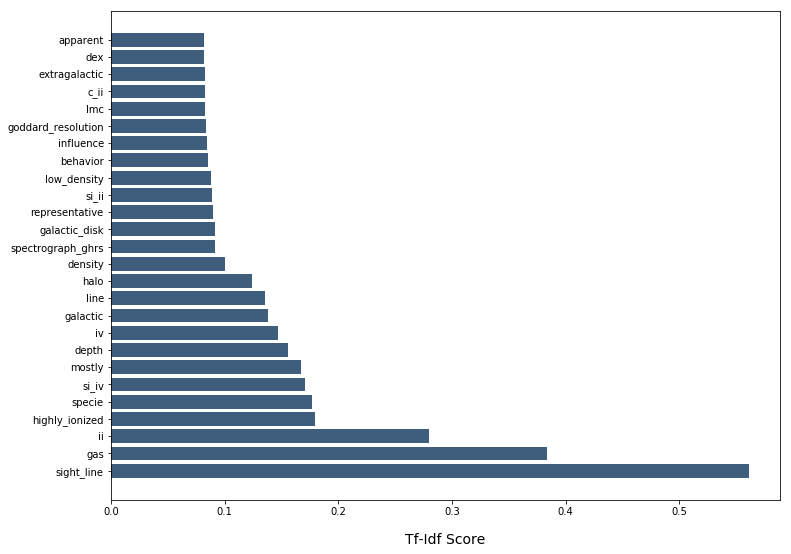

In [131]:
df4plot = pd.DataFrame.from_dict(abs_dict_list[1])
df4p1 = df4plot.sort_values(by='frequency', ascending=False).head(26)
plt.figure(figsize=(12, 9))
plt.xlabel("Tf-Idf Score", labelpad=16, fontsize=14)
plt.barh(df4p1.term, df4p1.frequency, align='center', color='#3F5D7D')

## Post-n-gram stopwords removal

In [132]:
places = []
with open('post2_stop.txt', 'r') as filehandle:  
    for line in filehandle:
        currentPlace = line[:-1]
        places.append(currentPlace)

stop_words.extend(x for x in places if x not in stop_words)
len(stop_words)

702

In [146]:
# post-phrase detection stopword removal and 
from string import punctuation
remove_terms2 = punctuation + '0123456789'

abs_list_2 = [];
for i in range(len(matchingwords)):
    abs_sent_list = [];
    for j in range(len(matchingwords[i])):
        for k in reversed(range(len(matchingwords[i][j]))):
            if (matchingwords[i][j][k] in stop_words) or (len(matchingwords[i][j][k]) < 3):
                matchingwords[i][j].remove(matchingwords[i][j][k])
                # remove keywords that are one character long
            else:
                str2list = list(matchingwords[i][j][k])
                matches = [x for x in str2list if x in remove_terms2]
                if len(matches) == len(str2list):
                    matchingwords[i][j].remove(matchingwords[i][j][k])
                # break the keyword into single chars -- in order to do count -- , then remove keywords 
                # that are completely made up with numbers and punctuations
        text_2gram = ' '.join(matchingwords[i][j])
        abs_sent_list.append(text_2gram)
    abs_list_2.append(abs_sent_list)
print(len(abs_list_2))  

16408


In [149]:
#abs_para_2 is a list of all abstracts, each as a string, after phrase extraction and more stopwords removal
abs_para_2 = [];
for i in range(len(abs_list_2)):
    abs_para_ = '';
    for j in range(len(abs_list_2[i])):
        abs_para_ = abs_para_ + abs_list_2[i][j]
    abs_para_2.append(abs_para_)
len(abs_para_2)

16408

In [162]:
#now do tfidf on abs_para after post-n-gram stopwords removal
tvec3 = TfidfVectorizer(min_df=0.0005, max_df=0.2)
X3 = tvec3.fit_transform(abs_para_2)

abs_dict_list2 = [];
for i in range(X3.shape[0]):
    weights19_0 = np.squeeze(X3[i].toarray())
    df3 = pd.DataFrame({'term': tvec3.get_feature_names(), 'frequency': weights19_0})
    tfidf_dict = df3.sort_values(by='frequency', ascending=False).head(100).to_dict()
    abs_dict_list2.append(tfidf_dict)

In [187]:
abs_dict_list2[2]

{'term': {7833: 'radio_map',
  6953: 'optical_image',
  8131: 'relativistic_particle',
  5516: 'linear_scale',
  5515: 'linear_resolution',
  1280: 'camera_hst',
  6895: 'old_gt',
  9694: 'transport',
  10380: 'young_lt',
  6974: 'optical_radio',
  8597: 'similarity',
  8726: 'smooth',
  1449: 'channel',
  5906: 'magnetic_field',
  7804: 'radiation',
  1552: 'clearly',
  3364: 'faint_object',
  1399: 'central_region',
  6979: 'optical_spectrum',
  6980: 'optical_synchrotron',
  6981: 'optical_thickness',
  6982: 'optical_transient',
  6978: 'optical_spectroscopy',
  6983: 'optical_ultraviolet',
  6977: 'optical_spectroscopic',
  6984: 'optical_uv',
  6976: 'optical_spectra',
  6975: 'optical_source',
  6970: 'optical_nir',
  6973: 'optical_polarization',
  6972: 'optical_photometry',
  6955: 'optical_infrared',
  6956: 'optical_integral',
  6957: 'optical_ir',
  6958: 'optical_island',
  6959: 'optical_knot',
  6960: 'optical_light',
  6961: 'optical_line',
  6962: 'optical_longslit',


In [188]:
df4plot = pd.DataFrame.from_dict(abs_dict_list2[2])

<BarContainer object of 18 artists>

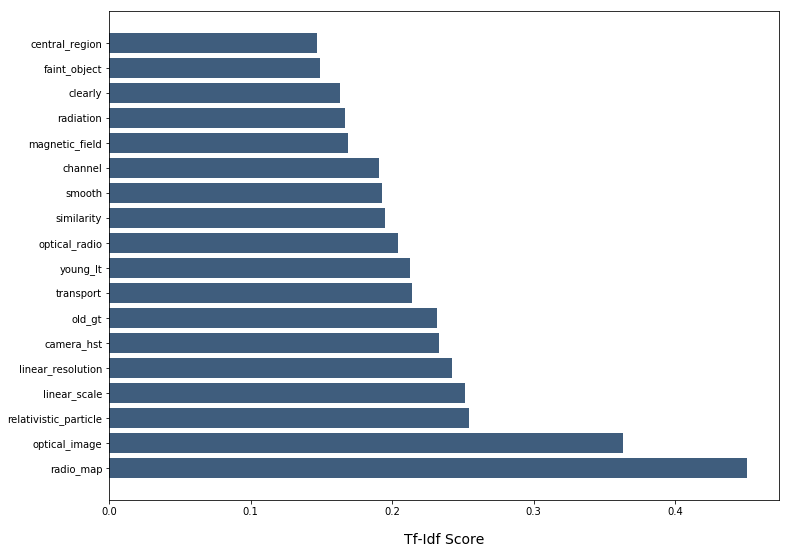

In [189]:
df4p1 = df4plot.sort_values(by='frequency', ascending=False).head(18)
plt.figure(figsize=(12, 9))
plt.xlabel("Tf-Idf Score", labelpad=16, fontsize=14)
plt.barh(df4p1.term, df4p1.frequency, align='center', color='#3F5D7D')

In [190]:
df_key_v1['abs_tfidf'] = abs_dict_list2
#'abs_tfidf' is output of tfidf model on abstracts , after bi-gram replacement

In [295]:
df_key_v1.columns

Index(['bibcode', 'keyword', 'keyword_norm', 'key_set_1', 'title2word',
       'norm_body', 'abs_words', 'norm_abs', 'abs_bi_para', 'abs_tfidf'],
      dtype='object')

In [191]:
key_4_abs = []
for i in range(len(abs_dict_list)):
    key_4_abs_ = [v for v in abs_dict_list2[i]['term'].values()]
    key_4_abs.append(key_4_abs_)

In [193]:
len(key_4_abs)

16408

In [236]:
title_key_old = [ast.literal_eval(x) for x in df_key_v1['key_set_1']]
len(title_key_old)

16408

In [203]:
for i in range(10):
    print(len(title_key_old[i]))

8
25
20
19
16
15
24
20
20
21


In [237]:
for i in range(len(title_key_old)):
    title_key_old[i].extend(x for x in title_key_19[i] if x not in title_key_old[i])   
for i in range(10):
    print(len(title_key_old[i]))

16
30
24
24
19
19
27
24
22
25


In [238]:
for i in range(len(key_4_abs)):
    title_key_old[i].extend(x for x in key_4_abs[i] if x not in title_key_old[i])   
for i in range(10):
    print(len(title_key_old[i]))

116
128
124
124
119
118
126
121
121
124


In [239]:
for _ in range(len(title_key_old)):
    for j in reversed(range(len(title_key_old[_]))):
        try: 
            title_key_old[_][j] = title_key_old[_][j].replace("_", " ")
        except:
            title_key_old[_][j] = title_key_old[_][j]
            
len(title_key_old)      

16408

In [242]:
for i in range(len(title_key_old)):
    for j in reversed(range(len(title_key_old[i]))):
        title_key_old[i]=[x for x in title_key_old[i] if x not in stop_words]

In [216]:
len(stop_words)

702

In [209]:
for i in range(10):
    print(len(title_key_old[i]))

116
128
124
124
119
118
126
121
121
124


In [243]:
title_key_old[4]

['space vehicle',
 'astrophysic',
 'galaxy general',
 'star wind outflow',
 'nebulae',
 'stellar luminosity',
 'star luminosity functionmass function',
 'hubble space telescope',
 'stellar wind',
 'wolfrayet star',
 'star massive',
 'star wolf rayet',
 'massive star',
 'stellar model',
 'milky way galaxy',
 'n',
 'carninae',
 'thin shell',
 'expel',
 'linear feature',
 '02 arcsec',
 'homunculus',
 'cap',
 'nebulosity',
 'carinae',
 'luminous star',
 'polar',
 'clumpy',
 'spatial resolution',
 'optical spectroscopic',
 'optical spectroscopy',
 'optical spectrum',
 'optical thickness',
 'optical synchrotron',
 'optical source',
 'optical transient',
 'optical ultraviolet',
 'optical uv',
 'optical variability',
 'optical wavelength',
 'optical xray',
 'optical spectra',
 'optical nucleus',
 'optical radio',
 'optical polarization',
 'optical ir',
 'optical island',
 'optical knot',
 'optical light',
 'optical line',
 'optical longslit',
 'optical luminosity',
 'optical midinfrared',
 'op

In [244]:
df_key_v1['key_0629'] = title_key_old
df_key_v1.columns

Index(['bibcode', 'keyword', 'keyword_norm', 'key_set_1', 'title2word',
       'norm_body', 'norm_abs', 'abs_bi_para', 'abs_tfidf', 'key_0629'],
      dtype='object')

In [211]:
%store title_key_old

Stored 'title_key_old' (list)


In [253]:
df2.columns

Index(['Unnamed: 0', 'abstract', 'bibcode', 'body', 'keyword', 'keyword_norm',
       'title', 'title_key', 'key_0619'],
      dtype='object')

In [246]:
df_key_0629 = df_key_v1[['bibcode','key_0629']]
df_key_0629.to_csv('/Users/yanfeiwang/Downloads/df_key_0629.csv', index=False)